In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/Italy/energy-italy.csv', sep=';')
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='ITA']

gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='ITA']
ITA_table = pd.merge(gdp_table, pop_table, on=['Year'])
ITA_table = pd.merge(ITA_table, energy_table, on=['Year'])
ITA_table

,Year,GDP per capita,Entity,Code,"Total population (Gapminder, HYDE & UN)",Energy (PetaJoules),Energy (TWh)
0,1862,2634.35,Italy,ITA,26471122,441.281000,127.008962
1,1863,2688.11,Italy,ITA,26642796,441.281000,127.008962
2,1864,2642.03,Italy,ITA,26812516,438.010000,126.067507
3,1865,2780.28,Italy,ITA,26980520,434.031000,124.922276
4,1866,2588.27,Italy,ITA,27150708,430.052000,123.777045
...,...,...,...,...,...,...,...
152,2014,32829.00,Italy,ITA,60410000,6013.422615,1730.776000
153,2015,33118.00,Italy,ITA,60578000,6146.509828,1769.081000
154,2016,33419.00,Italy,ITA,60663000,6206.241856,1786.273000
155,2017,34027.34,Italy,ITA,60674000,6267.401867,1803.876000


In [2]:
pop = ITA_table['Total population (Gapminder, HYDE & UN)']
gdp = ITA_table['GDP per capita']*pop
energy = ITA_table['Energy (PetaJoules)']
year = ITA_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

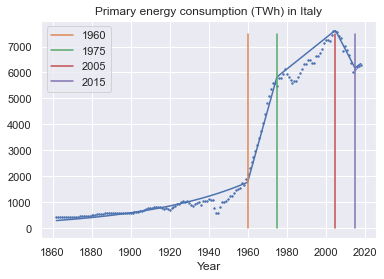

In [9]:
plt.scatter(year, energy, s=2) 
plt.xlabel('Year')
plt.title('Primary energy consumption (TWh) in Italy')

y0, r, a,c,e,g,x1,x2,x3,x4  = 0.75*10**-12,  0.0180616948382301577, 270,60,-145,55,1960, 1975,2005,2015

plt.plot(yplot, reg.expllll(yplot,y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot([x1, x1], [0, 7500], label=str(int(x1)))
plt.plot([x2, x2], [0, 7500], label=str(int(x2)))
plt.plot([x3, x3], [0, 7500], label=str(int(x3)))
plt.plot([x4, x4], [0, 7500], label=str(int(x4)))


plt.legend()
ypred = reg.expllll(year,y0, r, a,c,e,g,x1,x2,x3,x4)
ITA_table['Energy(PJ)-Time(Year)'] = ypred

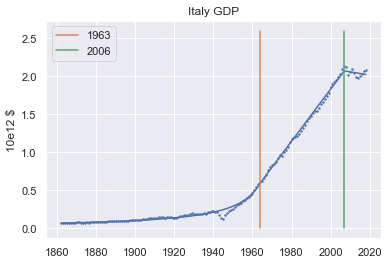

In [23]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('Italy GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 2.6], label=str(int(x1)))
plt.plot([x2, x2], [0, 2.6], label=str(int(x2)))
plt.legend()
plt.ylabel('10e12 $')
ypred= (10**12)*reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )
ITA_table['GDP(2011$)-Time(year)']=ypred

(0.188378735512, 0.0092227, 9.999725341796875, -0.016008851137697448, 0.026874721697528133, 0.021444282968566347)


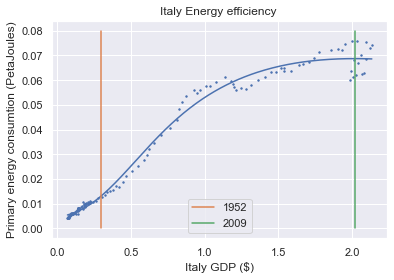

In [18]:
g= gdp/10**12
e = energy/10**5
gplot = np.linspace(g.min(), g.max(), 200)
plt.scatter(g,e, s= 2)
plt.xlabel('Italy GDP ($)')
plt.ylabel('Primary energy consumtion (PetaJoules)')
plt.title('Italy Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [-5, 1000])
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-0.3) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
plt.plot([0.3, 0.3],[0.0, 0.08], label = str(year_infl))

e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
plt.plot([gplot[e_max], gplot[e_max]], [0.0, 0.08], label = str(year_max)) 
plt.legend()
ypred = reg.s_model(g,G_i, E_i, A, a1, a2, a3)*(10**5)*3.6
ITA_table['Energy(PJ)-GDP(10e12$)'] = ypred

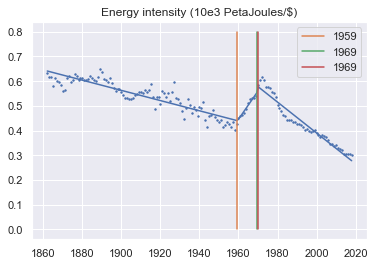

In [19]:
plt.scatter(year, energy/gdp*10**8, s=2)
a,b, c, e, g, x1, x2, x3 = -10, 10, 10, -3*10, -1.5*10, 1959, 1970, 1983
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-200,2010])
plt.plot(yplot, reg.llll(yplot,a,b, c, e, g, x1, x2, x3 ))

plt.plot([x1, x1], [0, 0.8], label=str(int(x1)))
plt.plot([x2, x2], [0, 0.8], label=str(int(x2)))
plt.plot([x3, x3], [0, 0.8], label=str(int(x3)))
plt.legend()
plt.title('Energy intensity (10e3 PetaJoules/$)')
ypred= (10**8)*3.6*reg.llll(year,a,b, c, e, g, x1, x2, x3 )
ITA_table['EI(PJ/$)-Time(year)']=ypred


,Year,GDP per capita,Entity,Code,Population,Primary energy (PJ),Primary energy (TWh),Energy(PJ)-Time(Year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year),GDP(2011$)-Time(year)
0,1862,2634.35,Italy,ITA,26471122,441.281000,127.008962,302.527626,1961.210579,2.307700e+08,6.914892e+10
1,1863,2688.11,Italy,ITA,26642796,441.281000,127.008962,308.041433,1972.416862,2.300274e+08,6.975394e+10
2,1864,2642.03,Italy,ITA,26812516,438.010000,126.067507,313.655732,1967.761292,2.292848e+08,7.036965e+10
3,1865,2780.28,Italy,ITA,26980520,434.031000,124.922276,319.372357,1993.053612,2.285422e+08,7.099632e+10
4,1866,2588.27,Italy,ITA,27150708,430.052000,123.777045,325.193172,1964.398433,2.277996e+08,7.163426e+10
...,...,...,...,...,...,...,...,...,...,...,...
152,2014,32829.00,Italy,ITA,60410000,6013.422615,1730.776000,6321.177202,24735.182694,1.090794e+08,2.042169e+12
153,2015,33118.00,Italy,ITA,60578000,6146.509828,1769.081000,6176.177202,24738.766026,1.068315e+08,2.037942e+12
154,2016,33419.00,Italy,ITA,60663000,6206.241856,1786.273000,6231.177202,24738.813070,1.045837e+08,2.033714e+12
155,2017,34027.34,Italy,ITA,60674000,6267.401867,1803.876000,6286.177202,24731.574234,1.023358e+08,2.029486e+12


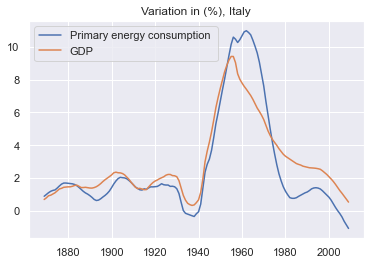

In [20]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), Italy")
ITA_table

In [24]:
ITA_table= ITA_table.rename(columns={'Energy (PetaJoules)':'Primary energy (PJ)', 'Energy (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)': 'Population'})
ITA_table.to_csv('../BDD/final_tables/ITA.csv', index=False)

In [25]:
ITA_table.head()


,Year,GDP per capita,Entity,Code,Population,Primary energy (PJ),Primary energy (TWh),Energy(PJ)-Time(Year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year),GDP(2011$)-Time(year)
0,1862,2634.35,Italy,ITA,26471122,441.281,127.008962,302.527626,1961.210579,2.307700e+08,6.914892e+10
1,1863,2688.11,Italy,ITA,26642796,441.281,127.008962,308.041433,1972.416862,2.300274e+08,6.975394e+10
2,1864,2642.03,Italy,ITA,26812516,438.010,126.067507,313.655732,1967.761292,2.292848e+08,7.036965e+10
3,1865,2780.28,Italy,ITA,26980520,434.031,124.922276,319.372357,1993.053612,2.285422e+08,7.099632e+10
4,1866,2588.27,Italy,ITA,27150708,430.052,123.777045,325.193172,1964.398433,2.277996e+08,7.163426e+10
